# Laboratorio 6 Grupal "Aprendizaje por Refuerzo".
#### Nombres:
####          - Aramayo Valdez Joaquin.
####          - Piza Nava Vladimir.
####          - Viza Hoyos Maria Belen.
####          - Mendoza Ovando Carlos Saul.
####          - Solorzano Diego.
#### Link GitHub: https://github.com/Joaco15045F/InteligenciaArtificial/blob/main/Laboratorio6%20grupal%20AxR/Lab6_BipedalWalker.ipynb
#### Link info BipedalWalker: https://www.gymlibrary.dev/environments/box2d/bipedal_walker/



### Importación de Librerías
#### Importamos las librerías clave para configurar y entrenar un modelo de aprendizaje por refuerzo. gymnasium crea el entorno de simulación, PPO aplica el algoritmo de entrenamiento, y EvalCallback permite evaluar y guardar el mejor modelo. Además, se importan herramientas para normalizar datos y vectorizar el entorno, y otras librerías para la gestión de archivos, visualización y cálculos numéricos.

In [1]:
#Importar librerías necesarias para el entrenamiento de aprendizaje por refuerzo

import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv, VecNormalize
from stable_baselines3.common.callbacks import EvalCallback
import os
import time
import matplotlib.pyplot as plt
import numpy as np

### Configuración del Entorno y del Modelo
#### Definimos el entorno de simulación y la ruta donde se guardará el modelo entrenado. ENV_NAME establece el entorno BipedalWalker-v3, y MODEL_PATH define el nombre del archivo para el modelo guardado. Se crea el entorno vectorizado (DummyVecEnv), configurado para renderizar en modo humano, permitiendo observar el entrenamiento en tiempo real. Además, se normalizan las observaciones y recompensas (VecNormalize) para estabilizar el aprendizaje del agente.

In [2]:
# Definir el nombre del entorno y la ruta para guardar el modelo entrenado
ENV_NAME = "BipedalWalker-v3"
MODEL_PATH = "ppo_bipedalwalker"

# Crear el entorno con la opción de renderizar en modo humano para observar el entrenamiento en tiempo real
env = DummyVecEnv([lambda: gym.make(ENV_NAME, render_mode="human")])  # Vectorizar y renderizar
env = VecNormalize(env, norm_obs=True, norm_reward=True)  # Normalizar observaciones y recompensas

### Carga del Modelo
#### Creamos y configuramos el modelo de aprendizaje por refuerzo utilizando el algoritmo PPO. Se especifica MlpPolicy, una red neuronal basada en perceptrones multicapa, como política de entrenamiento, y se asocia al entorno env. Los parámetros ajustan el modelo para un aprendizaje efectivo: learning_rate controla la tasa de aprendizaje, n_steps define el número de pasos por actualización, batch_size el tamaño de cada lote, n_epochs las épocas de entrenamiento, y gamma el factor de descuento que pondera recompensas futuras.

In [3]:
model = PPO("MlpPolicy", env, verbose=1, learning_rate=0.0003, n_steps=2048, batch_size=64, n_epochs=10, gamma=0.99)

Using cpu device


### Configuración de Callbacks para guardar el mejor modelo
#### En esta parte creamos un entorno de evaluación eval_env, similar al entorno de entrenamiento, con normalización de observaciones y recompensas para asegurar consistencia. Luego, configura eval_callback, un callback que evalúa el modelo cada 5000 pasos (eval_freq). También guardamos el mejor modelo en MODEL_PATH y registra el progreso en la carpeta ./logs/, ayudando a monitorear y conservar el mejor rendimiento durante el entrenamiento

In [4]:
eval_env = DummyVecEnv([lambda: gym.make(ENV_NAME)])
eval_env = VecNormalize(eval_env, norm_obs=True, norm_reward=True)
eval_callback = EvalCallback(eval_env, best_model_save_path=MODEL_PATH, log_path='./logs/', eval_freq=5000, deterministic=True)

### Entrenamiento del modelo
#### Ahora lo que hacemos es entrenar el modelo de aprendizaje por refuerzo durante 100,000 pasos (total_timesteps). En cada paso, el modelo selecciona una acción basada en el entorno observado, que luego se ejecuta para obtener una recompensa. Las recompensas acumuladas por episodio se almacenan en la lista rewards. Durante el entrenamiento, el entorno se renderiza y se ajusta la velocidad de visualización. Al finalizar cada episodio, el entorno se reinicia. eval_callback evalúa periódicamente el modelo, y finalmente, el modelo entrenado se guarda en MODEL_PATH.

In [ ]:
total_timesteps = 100000  # Aumentar el número de timesteps para un entrenamiento más prolongado
rewards = []

print("Entrenando el modelo y registrando recompensas por episodio...")
obs = env.reset()
episode_reward = 0

for timestep in range(total_timesteps):
    action, _ = model.predict(obs, deterministic=False)
    obs, reward, done, info = env.step(action)
    
    # Acumular recompensa y renderizar el entorno
    episode_reward += reward[0] if isinstance(reward, np.ndarray) else reward
    env.render()  # Renderizar el entorno en cada paso para ver la ventana de pygame
    time.sleep(0.01)  # Controla la velocidad del renderizado
    
    if done:
        rewards.append(episode_reward)  # Almacenar la recompensa del episodio
        obs = env.reset()
        episode_reward = 0
    
    # Ejecutar el aprendizaje y actualizar los parámetros
    model.learn(total_timesteps=1, reset_num_timesteps=False, callback=eval_callback)

# Guardar el modelo entrenado
model.save(MODEL_PATH)
print("Modelo entrenado y guardado.")

Entrenando el modelo y registrando recompensas por episodio...
-----------------------------
| time/              |      |
|    fps             | 48   |
|    iterations      | 1    |
|    time_elapsed    | 42   |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------
| time/              |      |
|    fps             | 48   |
|    iterations      | 1    |
|    time_elapsed    | 42   |
|    total_timesteps | 4096 |
-----------------------------


c:\Users\joaco\AppData\Local\Programs\Python\Python310\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=5000, episode_reward=-13.83 +/- 0.53
Episode length: 90.20 +/- 16.53
---------------------------------
| eval/              |          |
|    mean_ep_length  | 90.2     |
|    mean_reward     | -13.8    |
| time/              |          |
|    total_timesteps | 5000     |
---------------------------------
New best mean reward!
-----------------------------
| time/              |      |
|    fps             | 47   |
|    iterations      | 1    |
|    time_elapsed    | 43   |
|    total_timesteps | 6144 |
-----------------------------
-----------------------------
| time/              |      |
|    fps             | 48   |
|    iterations      | 1    |
|    time_elapsed    | 42   |
|    total_timesteps | 8192 |
-----------------------------
Eval num_timesteps=10000, episode_reward=-7.60 +/- 0.46
Episode length: 100.00 +/- 2.90
---------------------------------
| eval/              |          |
|    mean_ep_length  | 100      |
|    mean_reward     | -7.6     |
| time/ 

### Evaluacion del modelo
#### Una vez terminado el entrenamiento lo que hacemos es evaluar el modelo entrenado ejecutando 10,000 pasos en el entorno. En cada paso, el modelo selecciona una acción, se calcula la recompensa, y se acumula en total_reward. El entorno se renderiza en tiempo real, permitiendo visualizar el desempeño del agente, y se controla la velocidad de visualización. Cuando el episodio termina (done), el entorno se reinicia. Finalmente, se imprime la recompensa total acumulada, indicando el rendimiento del modelo.

In [ ]:
print("Evaluando el modelo...")
obs = env.reset()
total_reward = 0

for _ in range(10000):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    total_reward += reward[0] if isinstance(reward, np.ndarray) else reward
    
    env.render()  # Renderizar el entorno
    time.sleep(0.01)  # Controla la velocidad del renderizado
    
    if done:
        obs = env.reset()
        break

print(f"Evaluación completada. Recompensa total acumulada: {float(total_reward):.2f}")

Evaluando el modelo...
Evaluación completada. Recompensa total acumulada: -9.38


**Cierre del entorno**

In [ ]:
# Liberar los recursos utilizados por el entorno
env.close()

### Registro de Recompensas Durante el Entrenamiento
#### Una vez ya terminamos con todo, entrenamiento y evaluacion, lo que hacemos en esta parte es que, primero aseguramos que la lista rewards contenga solo valores escalares, convirtiendo cualquier valor ndarray en escalar. Luego definimos una función plot_rewards, que grafica las recompensas obtenidas por episodio. La primera gráfica muestra las recompensas acumuladas para cada episodio, y la segunda utiliza un promedio móvil para suavizar la curva y mostrar la tendencia general de las recompensas, facilitando la interpretación del progreso del agente. Finalmente, se llama a plot_rewards para visualizar las recompensas obtenidas durante el entrenamiento.

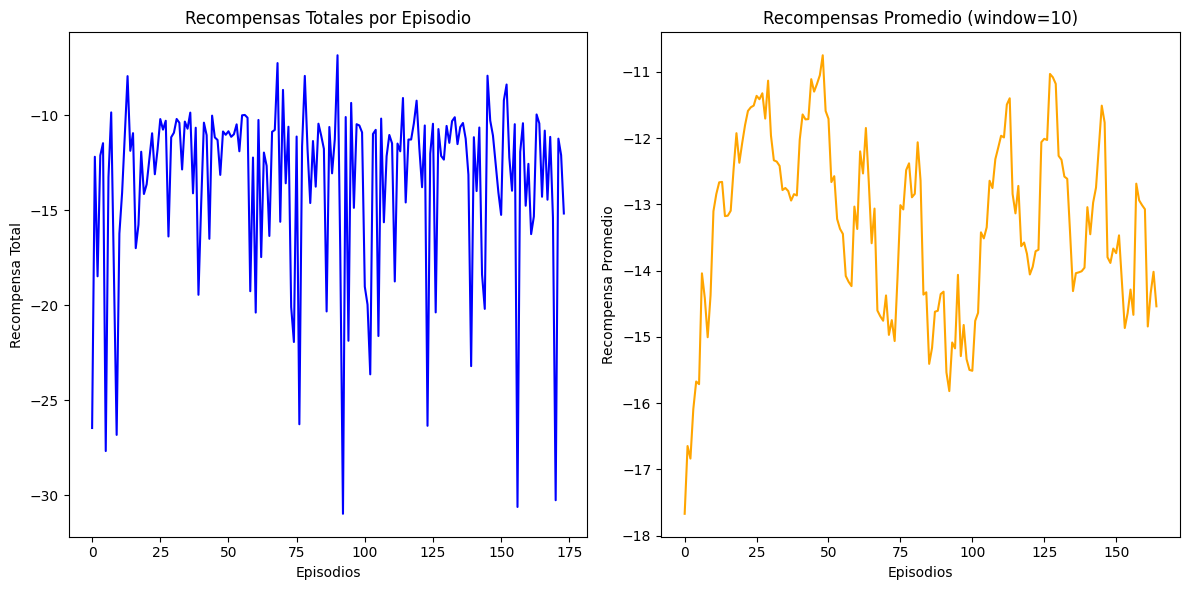

In [ ]:
# Asegurarse de que `rewards` contenga solo valores escalares
rewards = [reward.item() if isinstance(reward, np.ndarray) else reward for reward in rewards]

def plot_rewards(rewards, window=10):
    plt.figure(figsize=(12, 6))

    # Graficar recompensas acumuladas (sin promedio móvil)
    plt.subplot(1, 2, 1)
    plt.plot(rewards, color='blue')
    plt.title('Recompensas Totales por Episodio')
    plt.xlabel('Episodios')
    plt.ylabel('Recompensa Total')

    # Graficar promedio móvil para suavizar la curva
    rolling_mean = np.convolve(rewards, np.ones(window) / window, mode='valid')
    plt.subplot(1, 2, 2)
    plt.plot(rolling_mean, color='orange')
    plt.title(f'Recompensas Promedio (window={window})')
    plt.xlabel('Episodios')
    plt.ylabel('Recompensa Promedio')

    plt.tight_layout()
    plt.show()

# Graficar las recompensas registradas durante el entrenamiento
plot_rewards(rewards)